In [1]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

# re-size all the images
IMAGE_SIZE = [224, 224]
train_path = 'training/train'
valid_path = 'training/test'

In [2]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False 

In [3]:
# useful for getting number of classes
folders = glob('training/train/*')
folders

['training/train/happy',
 'training/train/surprise',
 'training/train/sadness',
 'training/train/anger',
 'training/train/contempt',
 'training/train/fear',
 'training/train/disgust']

In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# add  output layer
prediction = Dense(len(folders), activation='softmax')(x)
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)
# view the structure of the model
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)      

In [5]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy', #binary_crossentropy
  optimizer='adam',
  #optimizer=tf.keras.optimizers.Adam(learning_rate=00.1),
  metrics=['accuracy']
)

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('training/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('training/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 733 images belonging to 7 classes.
Found 102 images belonging to 7 classes.


In [7]:
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/30
23/23 [==============================] - 4s 192ms/step - loss: 1.9409 - accuracy: 0.2701 - val_loss: 1.7039 - val_accuracy: 0.4118
Epoch 2/30
23/23 [==============================] - 4s 177ms/step - loss: 1.6883 - accuracy: 0.4134 - val_loss: 1.5961 - val_accuracy: 0.5098
Epoch 3/30
23/23 [==============================] - 4s 168ms/step - loss: 1.5841 - accuracy: 0.4611 - val_loss: 1.5052 - val_accuracy: 0.5098
Epoch 4/30
23/23 [==============================] - 4s 169ms/step - loss: 1.5141 - accuracy: 0.4857 - val_loss: 1.4293 - val_accuracy: 0.5686
Epoch 5/30
23/23 [==============================] - 4s 170ms/step - loss: 1.4426 - accuracy: 0.5211 - val_loss: 1.3898 - val_accuracy: 0.5392
Epoch 6/30
23/23 [==============================] - 4s 174ms/step - loss: 1.3899 - accuracy: 0.5307 - val_loss: 1.3296 - val_accuracy: 0.5784
Epoch 7/30
23/23 [==============================] - 4s 176ms/step - loss: 1.3599 - accuracy: 0.5512 - val_loss: 1.2982 - val_accuracy: 0.6078
Epoch 

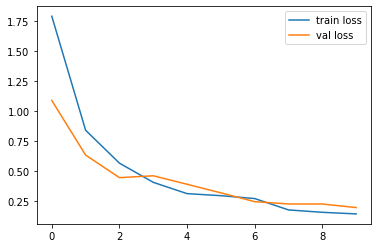

<Figure size 432x288 with 0 Axes>

In [8]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

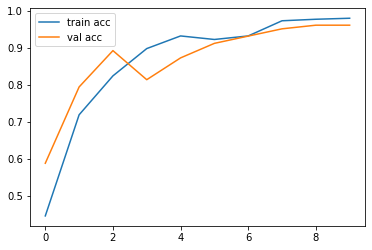

<Figure size 432x288 with 0 Axes>

In [9]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [11]:
import tensorflow as tf

from tensorflow.keras.models import load_model

model.save('vgg16-10epochs-_sobel.h5')